In [41]:
# %pip install pandas
# %pip install openpyxl
# %pip install matplotlib
# %pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [42]:
data = pd.read_excel('../unzipped_shp_and_shx_shape_files/cleaned_export.xlsx', na_values=".")

In [43]:
data2 = data[['fips', 'population', 'intersects_per_road_length', 'road_length_per_intersect', 'population_density']]

In [44]:
data2

,fips,population,intersects_per_road_length,road_length_per_intersect,population_density
0,6037,10014009,4.431645,0.225650,952.265145
1,17031,5275541,5.143695,0.194413,2155.620127
2,48201,4731145,3.749584,0.266696,1070.117372
3,4013,4420568,4.128898,0.242195,185.480108
4,6073,3298634,3.449335,0.289911,302.500992
...,...,...,...,...,...
3138,31117,399,0.637138,1.569519,0.179289
3139,48261,350,1.608964,0.621518,0.092650
3140,48269,265,1.670830,0.598505,0.112329
3141,15005,82,6.968886,0.143495,2.640255


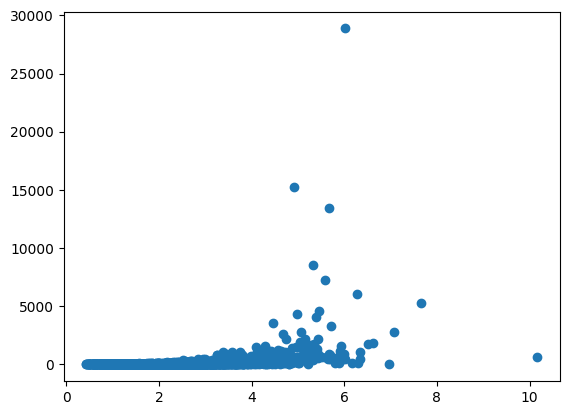

In [45]:
# Generate data...
x = data2['intersects_per_road_length']
y = data2['population_density']
c = data2['population']
# Plot...
plt.scatter(x, y)
plt.gray()

plt.show()

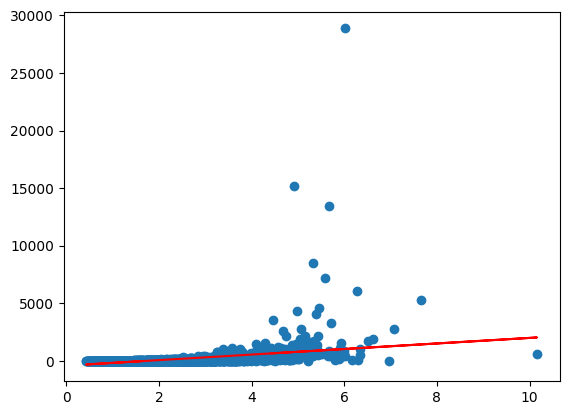

In [46]:

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here

# plt.savefig("figure.png")

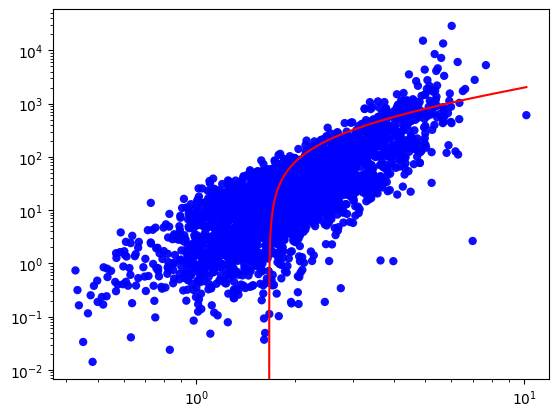

In [47]:
x1 = [X for (X,Y) in sorted(zip(x,y))]
y1 = [Y for (X,Y) in sorted(zip(x,y))]
x=np.array(x1)
y=np.array(y1)
fig = plt.figure()
ax=plt.gca() 
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] *x + fit[1], color='red') # add reg line
ax.scatter(x,y,c="blue",alpha=0.95,edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


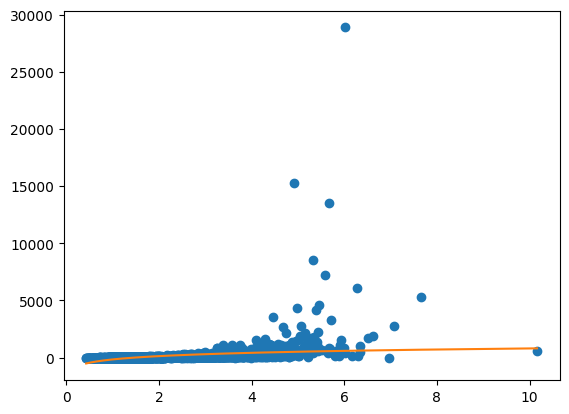

In [48]:
from scipy.optimize import curve_fit

plt.plot(x,y,'o')

# x = np.array(xdata, dtype=float) #transform your data in a numpy array of floats 
# y = np.array(ydata, dtype=float) #so the curve_fit can work

#def func(x,a,b,c):
#    return a*x**2+ b*x +c

def func(x,a,b):
    return a*np.log(x)+ b


popt, pcov = curve_fit(func, x, y)
x_sorted = np.sort(x)
plt.plot(x_sorted, func(x_sorted, *popt), label="Fitted Curve")
plt.show()

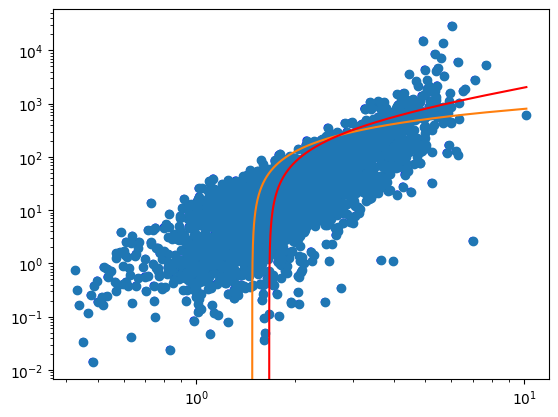

In [49]:
from scipy.optimize import curve_fit

plt.plot(x,y,'o')

# x = np.array(xdata, dtype=float) #transform your data in a numpy array of floats 
# y = np.array(ydata, dtype=float) #so the curve_fit can work

#def func(x,a,b,c):
#    return a*x**2+ b*x +c

def func(x,a,b):
    return a*np.log(x)+ b

ax=plt.gca() 
ax.plot(x_sorted, func(x_sorted, *popt), label="Fitted Curve")
ax.plot(x, fit[0] *x + fit[1], color='red') # add reg line
ax.scatter(x,y,c="blue",alpha=0.95,edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')

popt, pcov = curve_fit(func, x, y)
x_sorted = np.sort(x)
plt.show()

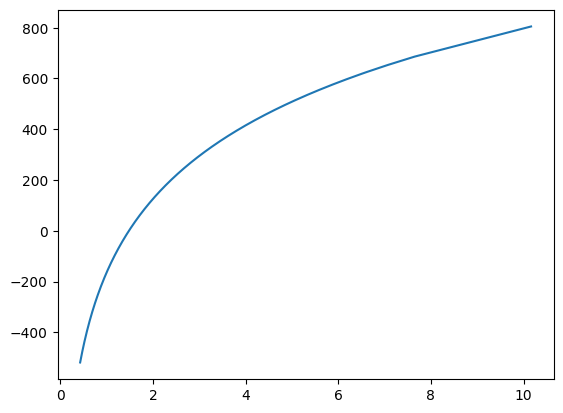

In [50]:

popt, pcov = curve_fit(func, x, y)
x_sorted = np.sort(x)
plt.plot(x_sorted, func(x_sorted, *popt), label="Fitted Curve")
plt.show()

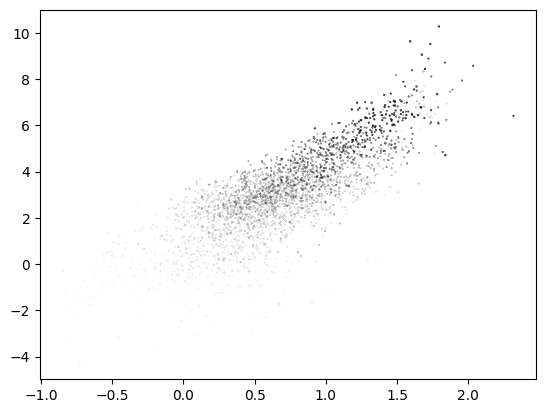

In [51]:
# Generate data...
x = data2['intersects_per_road_length']
y = data2['population_density']
c = data2['population']
# Plot...
# plt.scatter(x, y, c=c, marker='x')

xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, c=c,s = c/1000000, marker='.',)


plt.show()

LinregressResult(slope=3.184358197215628, intercept=0.7583433929097185, rvalue=0.781458545458342, pvalue=0.0, stderr=0.04536665682062835, intercept_stderr=0.035642087485973264)


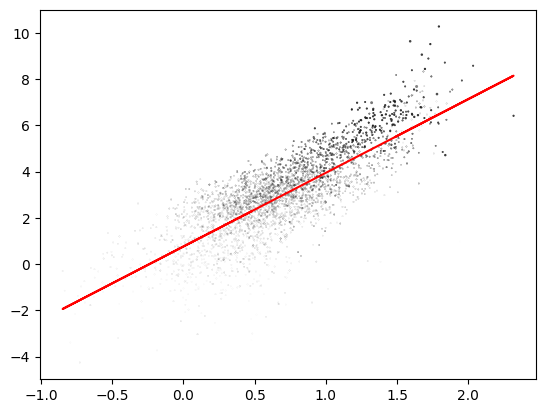

In [52]:
# Generate data...
x = data2['intersects_per_road_length']
y = data2['population_density']
c = data2['population']
# Plot...
# plt.scatter(x, y, c=c, marker='x')

xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, c=c,s = c/1000000, marker='.',)
plt.plot(xn, m * xn + b, color="red")   # I've added a color argument here

print(stats)

plt.show()

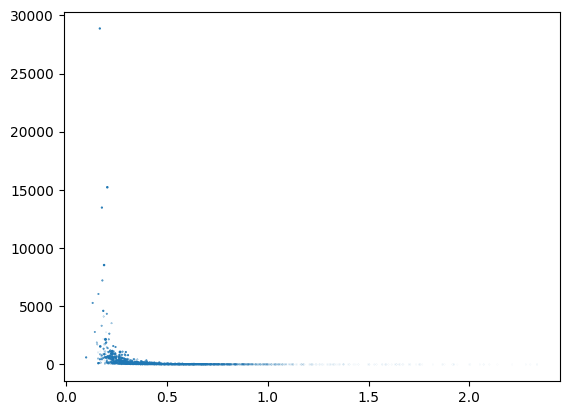

In [62]:
# calculate average road length per intersection per county

# Generate data...
x = data2['road_length_per_intersect']
y = data2['population_density']
c = data2['population']


xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(x, y, s = c/1000000, marker='.',)


plt.show()

# this seems to indicate taht the shorter the road length is per intersect, the higher the population density
# but this is a given because this is the inverse of the road intersections per population density


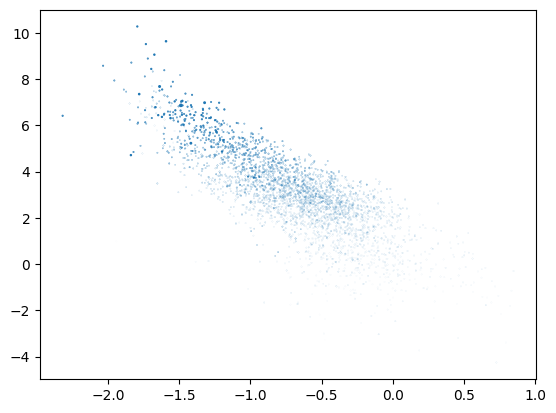

In [59]:
# calculate average road length per intersection per county

# Generate data...
x = data2['road_length_per_intersect']
c = data2['population']


xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, s = c/1000000, marker='.',)


plt.show()

In [ ]:
# select counties with population sizes of certain sizes and group them by color

In [63]:
stats = linregress(x, y)


In [ ]:
stats

LinregressResult(slope=240.91971611083343, intercept=-402.14550327003985, rvalue=0.3367780507226551, pvalue=3.283842036373792e-84, stderr=12.018594816085837, intercept_stderr=28.144441180769928)

In [ ]:
stats.rvalue

0.3367780507226551

In [ ]:
x

0       1.863687
1       2.550889
2       1.440980
3       1.552760
4       1.603651
          ...   
3138    1.396879
3139    1.630810
3140    1.386475
3141    0.982168
3142    1.459227
Name: intersects_per_road_length, Length: 3143, dtype: float64

In [ ]:
y

0       38.194205
1       56.285207
2       11.004030
3       13.827786
4       35.404088
          ...    
3138     1.565296
3139     2.253813
3140     3.792915
3141     1.325422
3142     1.100985
Name: population_density, Length: 3143, dtype: float64

In [ ]:
m

3.1843581972156296